In [47]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
%matplotlib inline

sns.set(style="ticks", color_codes=True, font_scale=1.5)
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [5]:
# Load the data file into a dataframe
df = pd.read_csv("C:/Users/patir/project_jupyter/Regression_Modelling/winequality-red.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Get basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.0

In [8]:
print("Totally there are {} null values in the dataset".format(df.isnull().sum().sum()))

Totally there are 0 null values in the dataset


In [15]:
columns = df.columns
print(columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [16]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

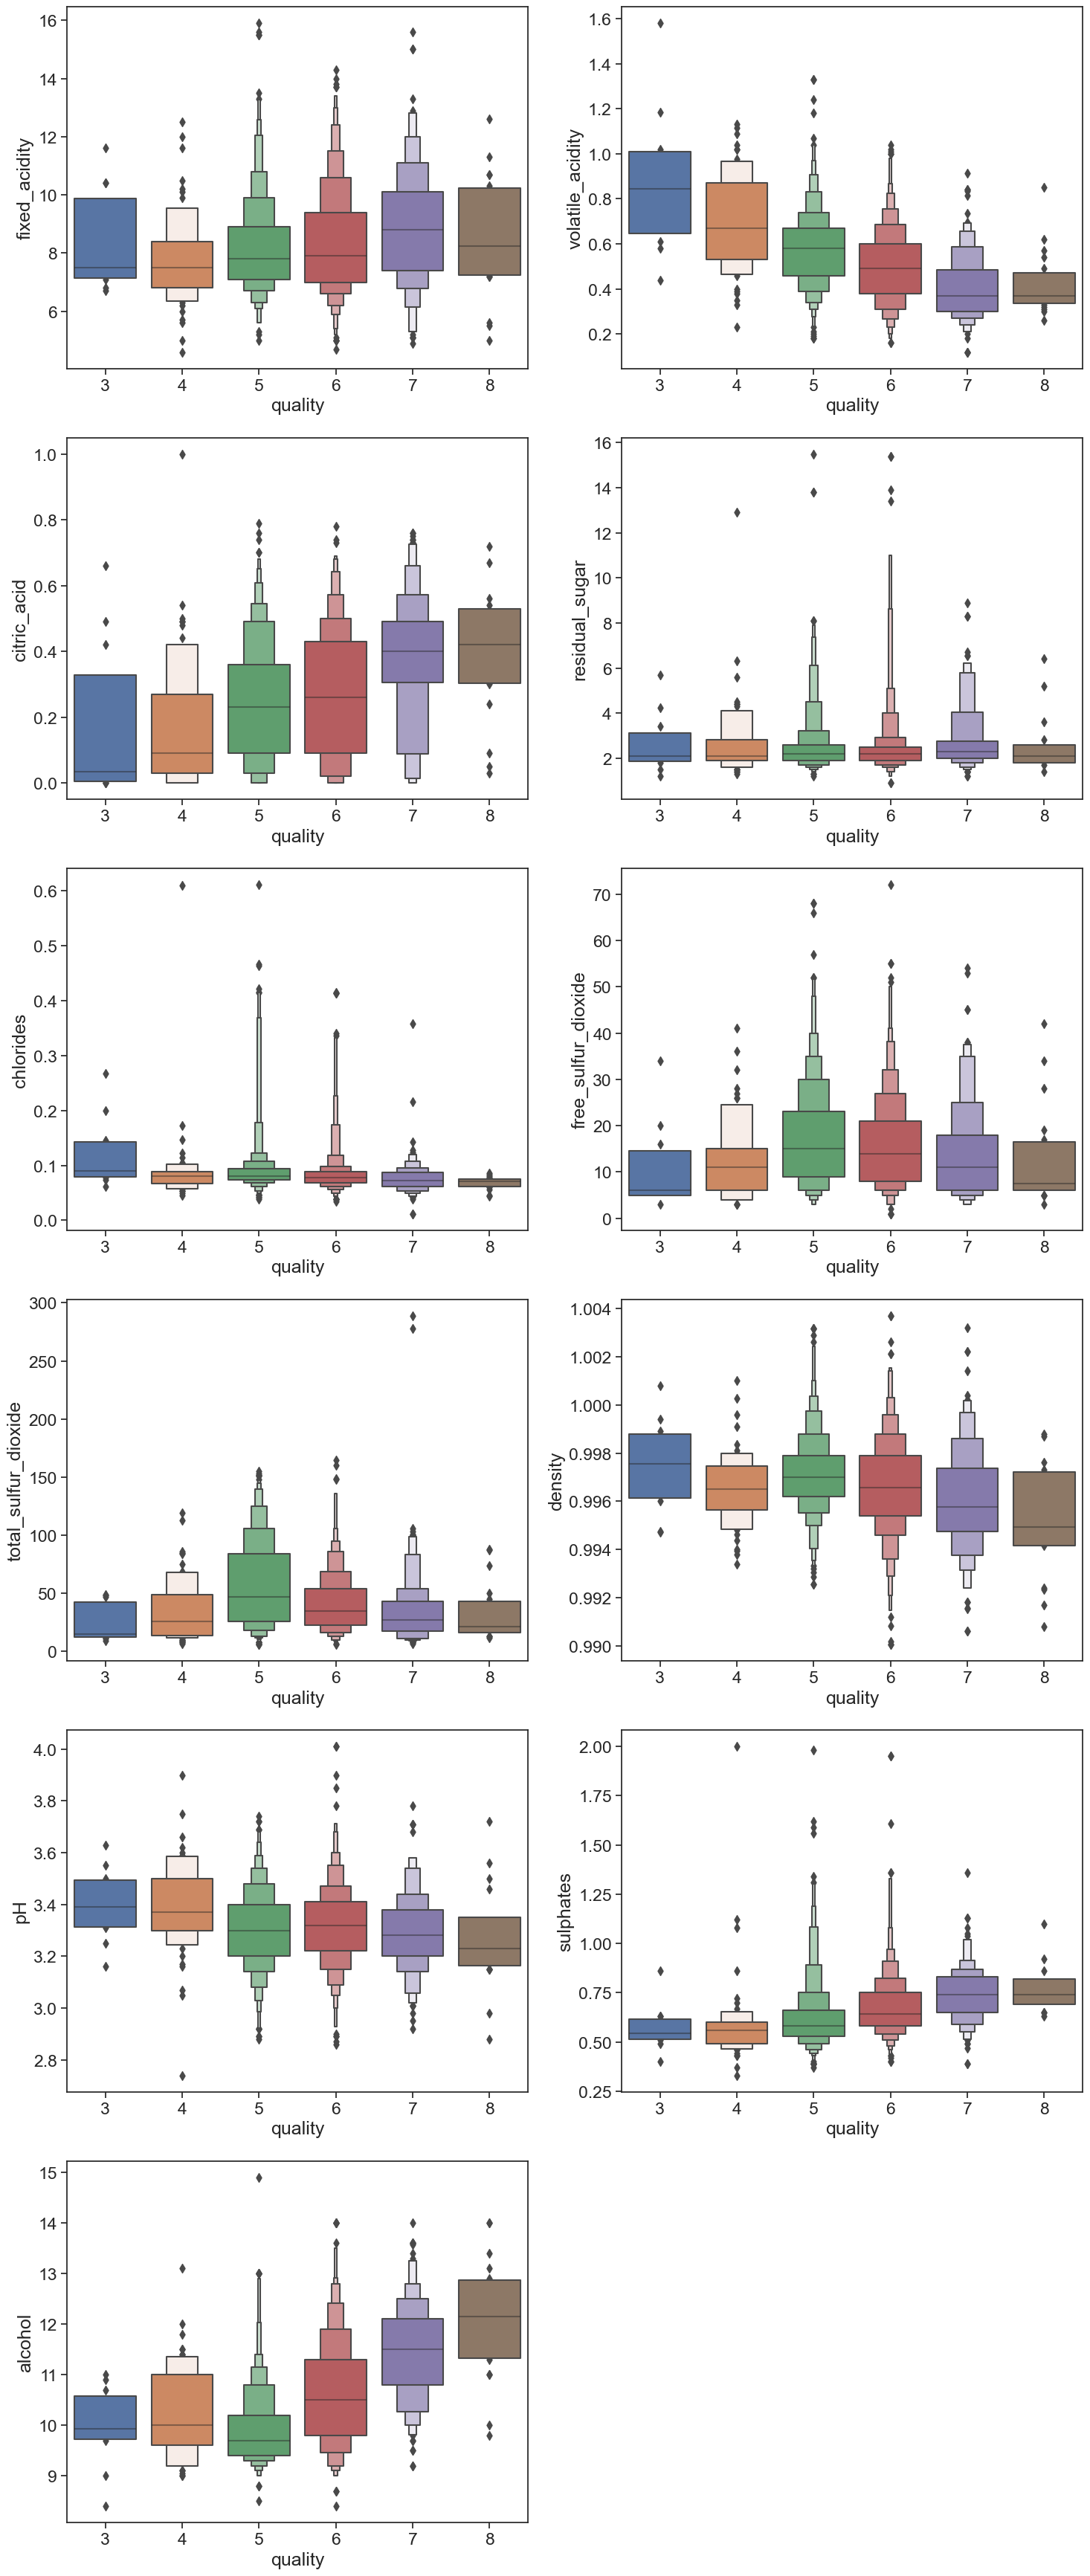

In [17]:
plt.figure(figsize=(15, 35))

for i in range(1,12):
    plt.subplot(6, 2, i)
    sns.boxenplot(x='quality', y=columns[i-1], data=df)

plt.tight_layout()
plt.show()

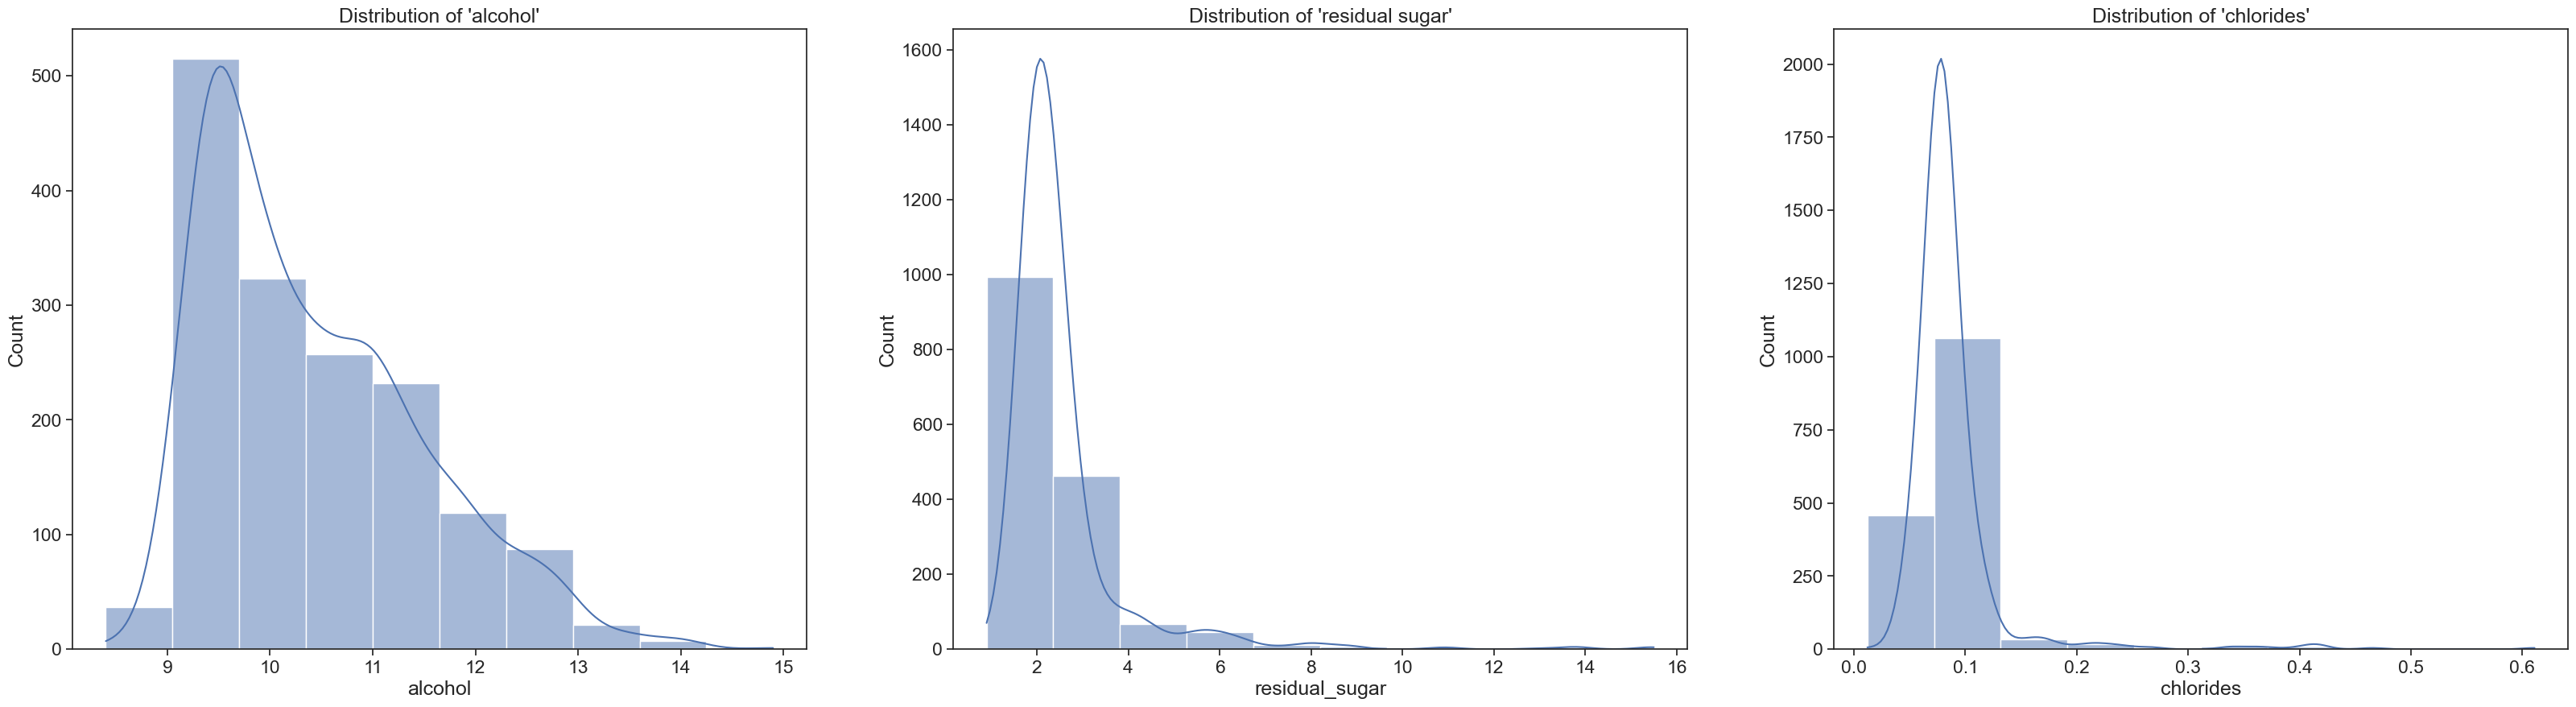

In [18]:
plt.figure(figsize=(40, 10))

plt.subplot(1, 3, 1)
sns.histplot(x=df["alcohol"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'alcohol'")

plt.subplot(1, 3, 2)
sns.histplot(x=df["residual_sugar"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'residual sugar'")

plt.subplot(1, 3, 3)
sns.histplot(x=df["chlorides"],
             bins=10,
             kde=True,
             cbar=True)
plt.title("Distribution of 'chlorides'")

plt.show()

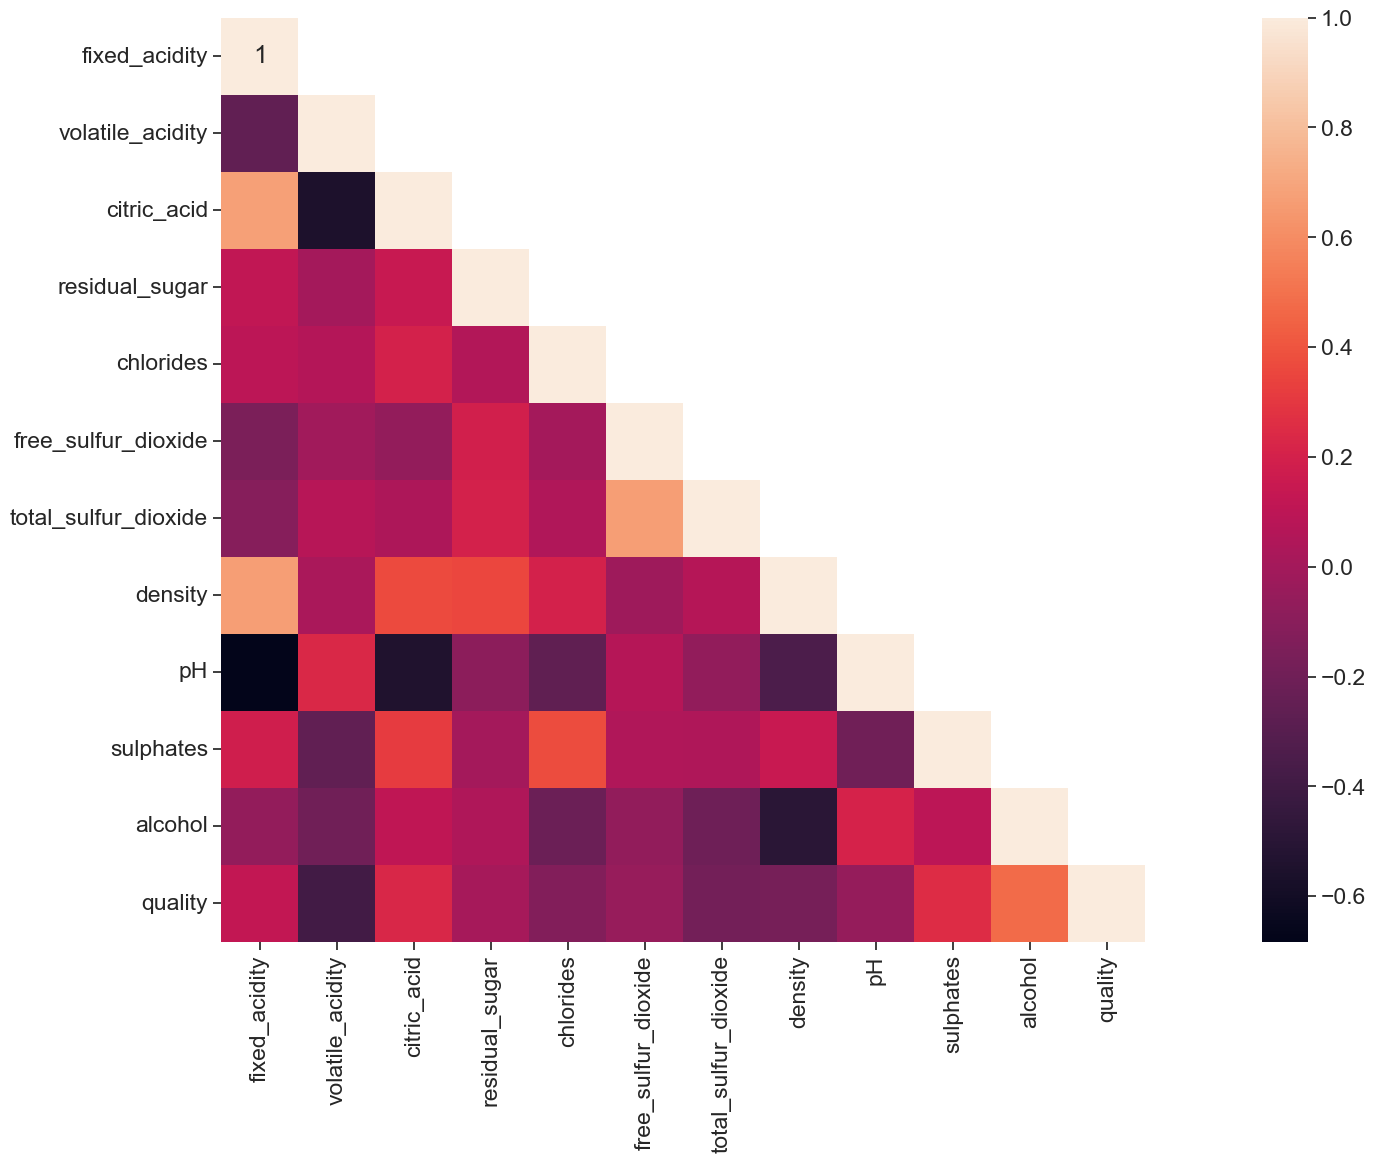

In [19]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)
fig.savefig('heatmap_3.png')

In [20]:
scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(df)
minmax = pd.DataFrame(minmax)

In [21]:
scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(df)
standard = pd.DataFrame(standard)

In [22]:
scaler = preprocessing.RobustScaler()
robust = scaler.fit_transform(df)
robust = pd.DataFrame(robust)

In [23]:
print('\033[1m'+'Without scaling:'+'\033[0m')
display(df.head())
print('*' * 45)
print('\033[1m'+'With minmax scaling:'+'\033[0m')
display(minmax.head())
print('*' * 45)
print('\033[1m'+'With standard scaling:'+'\033[0m')
display(standard.head())
print('*' * 45 )
print('\033[1m'+'With robust scaling:'+'\033[0m')
display(robust.head())

Without scaling:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


*********************************************
With minmax scaling:


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


*********************************************
With standard scaling:


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


*********************************************
With robust scaling:


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50,-1.0
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.25,-1.0
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.25,-1.0
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.25,0.0
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50,-1.0


In [24]:
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1
IQR.sort_values(ascending=False)

total_sulfur_dioxide    65.0000
free_sulfur_dioxide     21.0000
fixed_acidity            3.4000
alcohol                  2.2000
residual_sugar           1.1650
quality                  1.0000
citric_acid              0.4600
volatile_acidity         0.3515
pH                       0.3000
sulphates                0.2800
chlorides                0.0350
density                  0.0036
dtype: float64

In [25]:
wine = df [~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(wine)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  

In [26]:
# Separate features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

In [28]:
print(X_train[0:5])
print("\n")
print(X_train.shape)
print("_________________________________________________________________________")
print(X_test[0:5])
print("\n")
print(X_test.shape)

     fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
751            8.3             0.650         0.10             2.9      0.089   
370            6.9             0.765         0.02             2.3      0.063   
374           14.0             0.410         0.63             3.8      0.089   
537            8.1             0.825         0.24             2.1      0.084   
708            7.8             0.545         0.12             2.5      0.068   

     free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
751                 17.0                  40.0  0.99803  3.29       0.55   
370                 35.0                  63.0  0.99750  3.57       0.78   
374                  6.0                  47.0  1.00140  3.01       0.81   
537                  5.0                  13.0  0.99720  3.37       0.77   
708                 11.0                  35.0  0.99600  3.34       0.61   

     alcohol  
751      9.5  
370      9.9  
374     10.8  
53

In [29]:
print(df['quality'].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


<Axes: ylabel='count'>

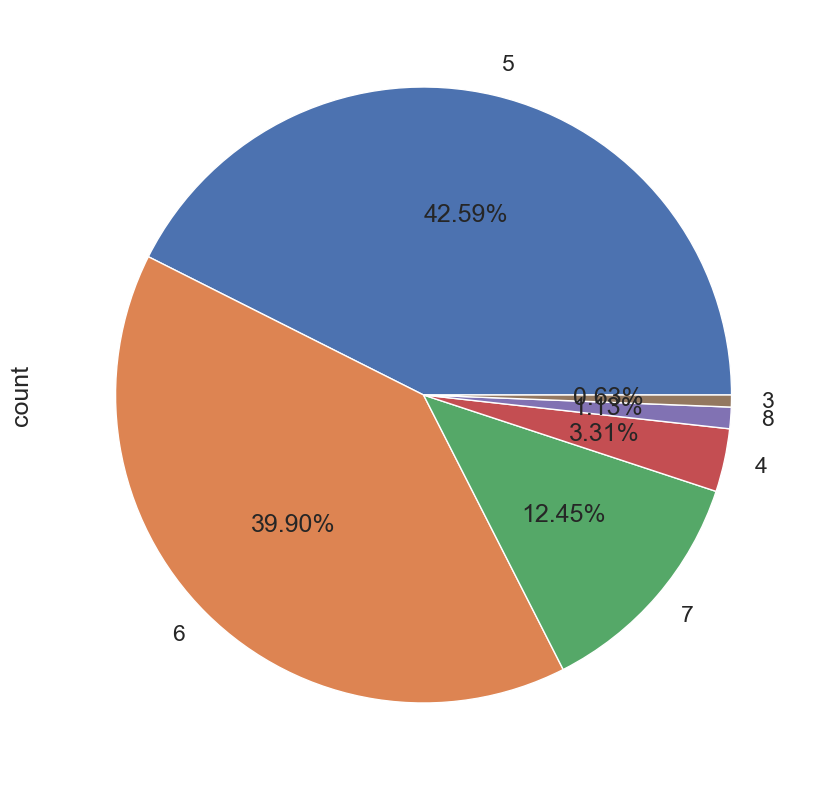

In [30]:
plt.figure(1, figsize=(10,10))
df['quality'].value_counts().plot.pie(autopct="%1.2f%%")

In [31]:
features = ['residual_sugar', 'total_sulfur_dioxide', 'sulphates',
                   'alcohol', 'volatile_acidity', 'quality']
df_features = df[features]

In [32]:
case_1 = (df_features['quality']==3)|(df_features['quality']==4)
case_2 = (df_features['quality']==5)|(df_features['quality']==6)
case_3 = (df_features['quality']==7)|(df_features['quality']==8)
level_34 = round(df_features[case_1].describe(),2)
level_56 = round(df_features[case_2].describe(),2)
level_78 = round(df_features[case_3].describe(),2)

In [33]:
level_all = pd.concat([level_34,level_56, level_78],
                    axis=1, 
                    keys=['3,4','5,6','7,8',])
level_all.T

count   mean    std   min    25%    50%    75%  \
3,4 residual_sugar          63.0   2.68   1.72  1.20   1.90   2.10   2.95   
    total_sulfur_dioxide    63.0  34.44  26.40  7.00  13.50  26.00  48.00   
    sulphates               63.0   0.59   0.22  0.33   0.50   0.56   0.60   
    alcohol                 63.0  10.22   0.92  8.40   9.60  10.00  11.00   
    volatile_acidity        63.0   0.72   0.25  0.23   0.56   0.68   0.88   
    quality                 63.0   3.84   0.37  3.00   4.00   4.00   4.00   
5,6 residual_sugar        1319.0   2.50   1.40  0.90   1.90   2.20   2.60   
    total_sulfur_dioxide  1319.0  48.95  32.71  6.00  24.00  40.00  65.00   
    sulphates             1319.0   0.65   0.17  0.37   0.54   0.61   0.70   
    alcohol               1319.0  10.25   0.97  8.40   9.50  10.00  10.90   
    volatile_acidity      1319.0   0.54   0.17  0.16   0.41   0.54   0.64   
    quality               1319.0   5.48   0.50  5.00   5.00   5.00   6.00   
7,8 residual_sugar         217.0   2.71   1.36  1.20   2.00   2.30   2.70   
    total_sulfur_dioxide   217.0  34.89  32.57  7.00  17.00  27.00  43.00   
    sulphates              217.0   0.74   0.13  0.39   0.65   0.74   0.82   
    alcohol                217.0  11.52   1.00  9.20  10.80  11.60  12.20   
    volatile_acidity       217.0   0.41   0.14  0.12   0.30   0.37   0.49   
    quality                217.0   7.08   0.28  7.00   7.00   7.00   7.00   

                             max  
3,4 residual_sugar         12.90  
    total_sulfur_dioxide  119.00  
    sulphates               2.00  
    alcohol                13.10  
    volatile_acidity        1.58  
    quality                 4.00  
5,6 residual_sugar         15.50  
    total_sulfur_dioxide  165.00  
    sulphates               1.98  
    alcohol                14.90  
    volatile_acidity        1.33  
    quality                 6.00  
7,8 residual_sugar          8.90  
    total_sulfur_dioxide  289.00  
    sulphates               1.36  
    alcohol                14.00  
    volatile_acidity        0.92  
    quality                 8.00

Mean Squared Error: 0.39002514396395427
Mean Absolute Error: 0.5057883195080454
R-squared: 0.4031803412796229
                      Coefficient
fixed_acidity            0.023085
volatile_acidity        -1.001304
citric_acid             -0.140821
residual_sugar           0.006564
chlorides               -1.806503
free_sulfur_dioxide      0.005627
total_sulfur_dioxide    -0.003644
density                -10.351594
pH                      -0.393688
sulphates                0.841172
alcohol                  0.281890


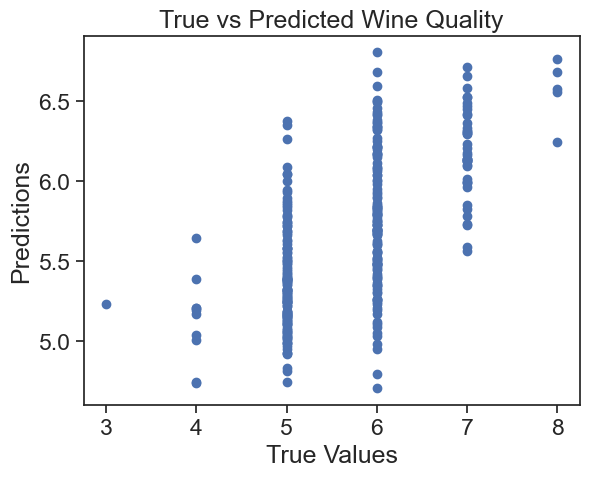

In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializes the normalizer
scaler = StandardScaler()

# Standardize the training set
X_train_scaled = scaler.fit_transform(X_train)

# Standardize the test set
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Display feature coefficients
coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plot true vs predicted quality
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Wine Quality")
plt.show()

Best Parameters: {'alpha': 0.01}
Best Cross-Validation Score: 0.44779313025204565
Mean Squared Error: 0.49867516307447735
Mean Absolute Error: 0.5057883195080454
R-squared: 0.23692319522368122
                      Coefficient
fixed_acidity            0.029804
volatile_acidity        -0.000000
citric_acid              0.000000
residual_sugar          -0.000000
chlorides               -0.000000
free_sulfur_dioxide      0.006538
total_sulfur_dioxide    -0.004184
density                 -0.000000
pH                      -0.000000
sulphates                0.000000
alcohol                  0.250518


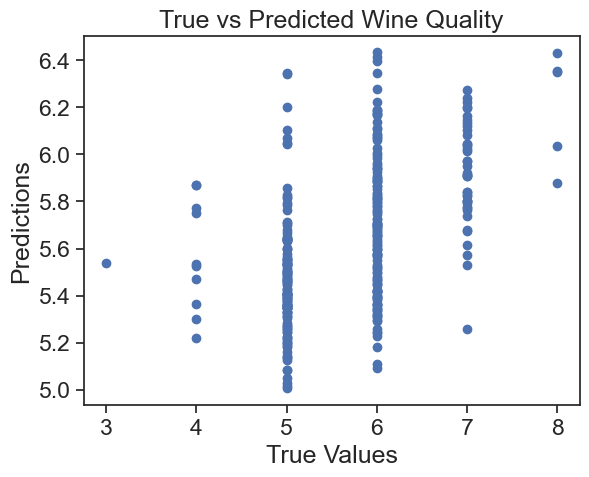

In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializes the normalizer
scaler = StandardScaler()

# Standardize the training set
X_train_scaled = scaler.fit_transform(X_train)

# Standardize the test set
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Display the best parameters and the best cross-validation score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {-grid_search.best_score_}")

# Predict on the test set
y_pred = lasso.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Display feature coefficients
coefficients = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plot true vs predicted quality
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Wine Quality")
plt.show()

Best Parameters: {'alpha': 1}
Best Cross-Validation Score: 0.43931582683684345
Mean Squared Error: 0.3929488678812798
Mean Absolute Error: 0.5057883195080454
R-squared: 0.39870643507758563
                      Coefficient
fixed_acidity            0.019614
volatile_acidity        -1.021529
citric_acid             -0.164270
residual_sugar           0.000624
chlorides               -1.226774
free_sulfur_dioxide      0.005686
total_sulfur_dioxide    -0.003561
density                 -0.011153
pH                      -0.376223
sulphates                0.746956
alcohol                  0.297591


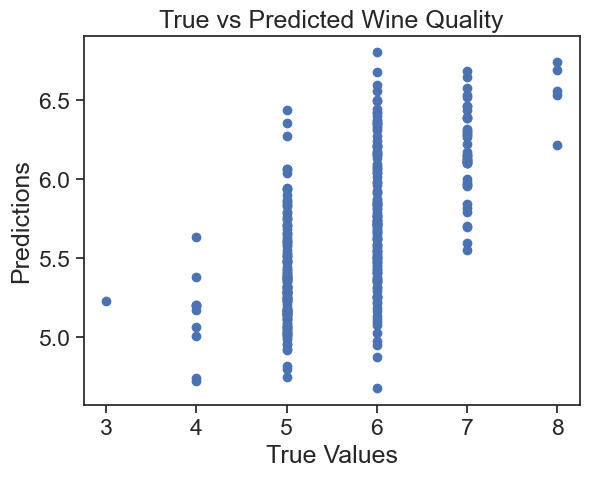

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializes the normalizer
scaler = StandardScaler()

# Standardize the training set
X_train_scaled = scaler.fit_transform(X_train)

# Standardize the test set
X_test_scaled = scaler.transform(X_test)

# Define the Ridge Regression model
ridge = Ridge()

# Define the parameter grid for hyperparameter tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Display the best parameters and the best cross-validation score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {-grid_search.best_score_}")

# Train the best model on the training data
best_ridge = grid_search.best_estimator_
best_ridge.fit(X_train, y_train)

# Predict on the test set
y_pred = best_ridge.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Display feature coefficients
coefficients = pd.DataFrame(best_ridge.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plot true vs predicted quality
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Wine Quality")
plt.show()

In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Ridge Regression model
ridge = Ridge()

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'saga', 'lsqr']
}

# Implement Grid Search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the best model on the training data
best_ridge = grid_search.best_estimator_
best_ridge.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_ridge.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized Ridge Regression - MSE: {mse}, R²: {r2}")

Best Parameters: {'alpha': 100, 'solver': 'saga'}
Optimized Ridge Regression - MSE: 0.3926958359356847, R²: 0.3990936266260089


In [58]:
X = df.drop('quality',axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge_model = Ridge().fit(X_train,y_train)
ridge_model

Ridge()

In [59]:
Ridge()

Ridge()

In [60]:
print("intercept: ", ridge_model.intercept_)
print("coef: ", ridge_model.coef_)

intercept:  3.70222540518391
coef:  [ 1.50587286e-02 -1.10944154e+00 -2.54698172e-01  2.04688603e-05
 -1.07857213e+00  4.74695022e-03 -3.22080863e-03 -1.22291919e-02
 -3.22989549e-01  7.12338598e-01  3.10880545e-01]


In [61]:
# coefficients for different lambda values
alphas = 10**np.linspace(10, -2, 100) * 0.5
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train,y_train)
    coefs.append(ridge.coef_)

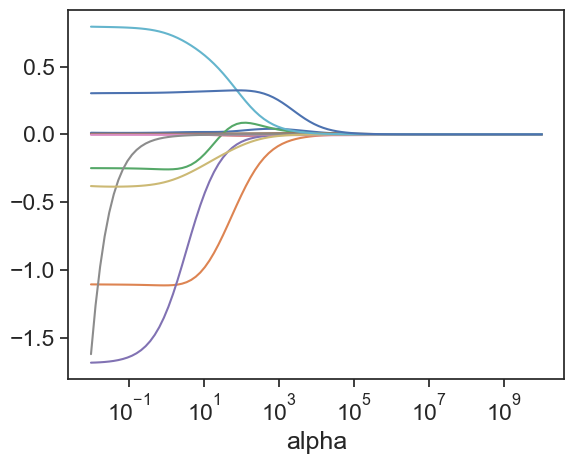

In [62]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.show()

In [63]:
ridge.predict(X_test)

array([5.36283774, 5.0793216 , 5.6324853 , 5.46003655, 5.74284147,
       5.28388903, 5.05869517, 5.12693534, 5.72978566, 5.71454713,
       6.11292258, 5.2437595 , 5.56377131, 5.25297938, 5.44203743,
       6.48571016, 5.17993491, 5.57966997, 6.5471646 , 5.29849896,
       5.41875642, 5.18588653, 5.99036259, 6.41330293, 5.36606113,
       5.42913366, 6.3747023 , 5.38133925, 5.16282801, 6.15003325,
       5.26422994, 5.55185559, 5.76283505, 5.34756426, 5.48089462,
       5.02800164, 6.1668146 , 5.70860805, 5.58889729, 6.18793977,
       5.44866518, 5.26316164, 6.15750867, 5.17892178, 5.81519352,
       5.80720595, 6.40959881, 5.54927113, 5.13669361, 5.57363341,
       5.14251656, 5.0823879 , 5.60552143, 6.41800728, 4.96751057,
       4.97733997, 6.01634854, 5.40802836, 5.86744383, 5.25713157,
       5.64356345, 5.96187535, 5.27094987, 5.31328274, 6.48972779,
       5.40713314, 6.32710475, 5.28662732, 6.45357944, 5.30964862,
       6.46662159, 4.72258286, 5.78376065, 5.87521542, 6.19803

In [38]:
y_pred = ridge.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.6414796258438102

In [39]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[i]))

Ridge model coefficients for fixed_acidity is 0.011250279501850818:
Ridge model coefficients for volatile_acidity is -1.1113362467734749:
Ridge model coefficients for citric_acid is -0.2529000144606829:
Ridge model coefficients for residual_sugar is 0.0014721157892773795:
Ridge model coefficients for chlorides is -1.6001288423410882:
Ridge model coefficients for free_sulfur_dioxide is 0.004688125742761407:
Ridge model coefficients for total_sulfur_dioxide is -0.003281057803528912:
Ridge model coefficients for density is -0.09474054476116925:
Ridge model coefficients for pH is -0.38041407075911216:
Ridge model coefficients for sulphates is 0.782195581324164:
Ridge model coefficients for alcohol is 0.30579416335861753:


In [40]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.01125641 -1.10834835 -0.24965313  0.00198352 -1.68198787  0.00468341
 -0.00329313 -0.86227183 -0.38509456  0.79345202  0.30429812]


In [41]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.3610422674361212
0.35092408970750233


In [42]:
y_pred = ridge.predict(X_test)

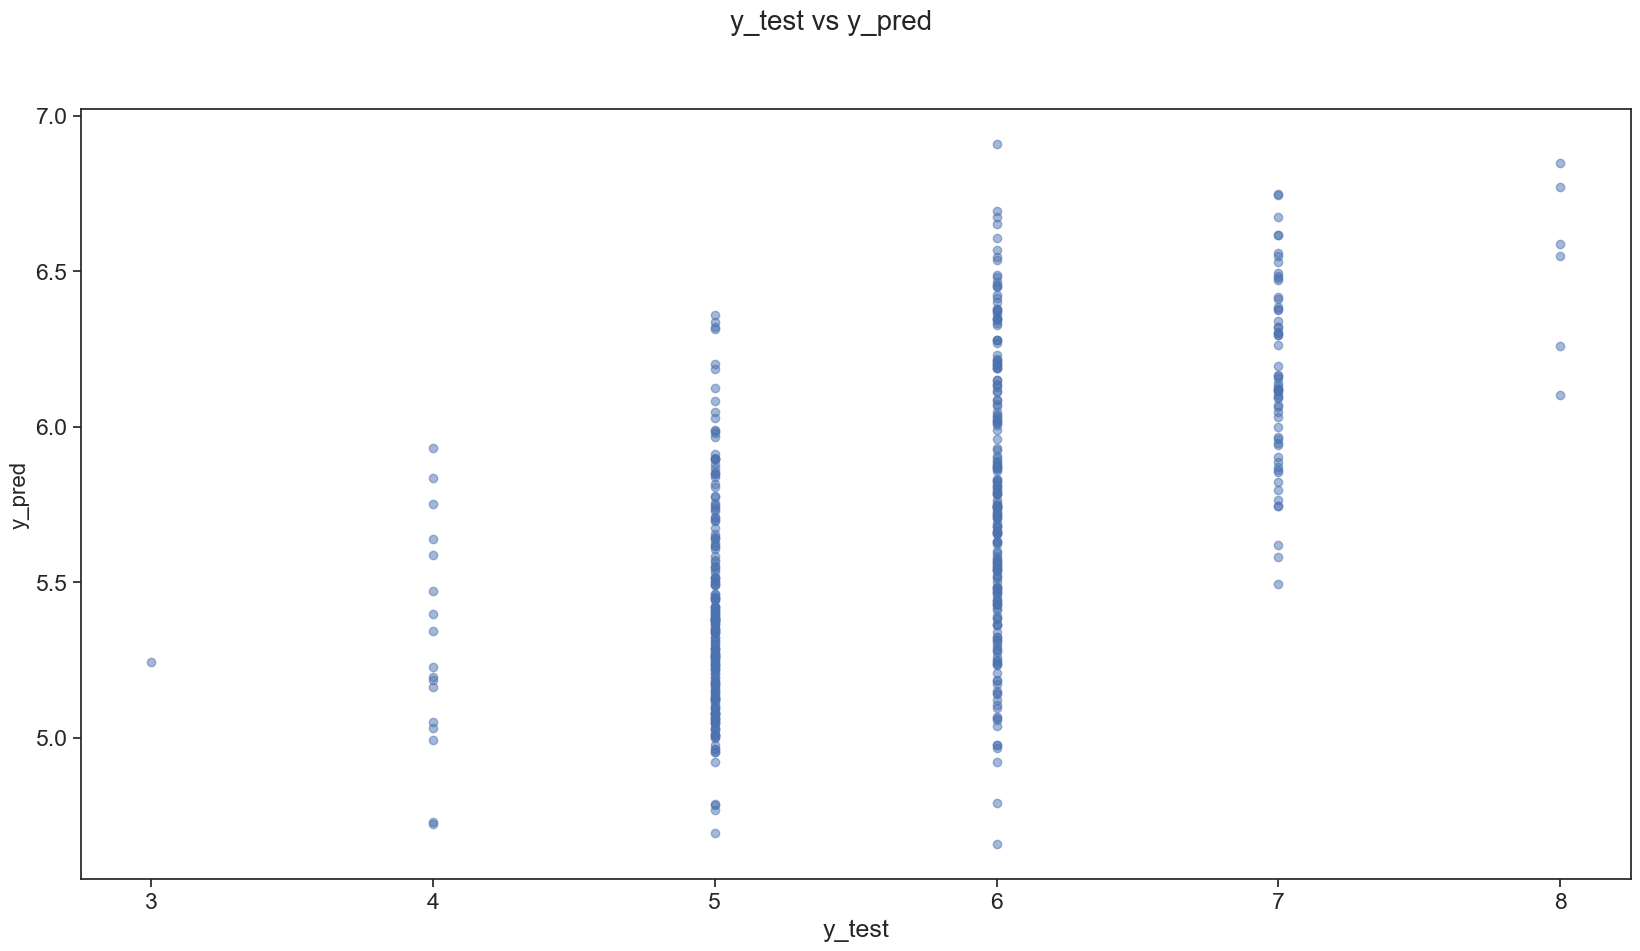

In [43]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [44]:
y.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

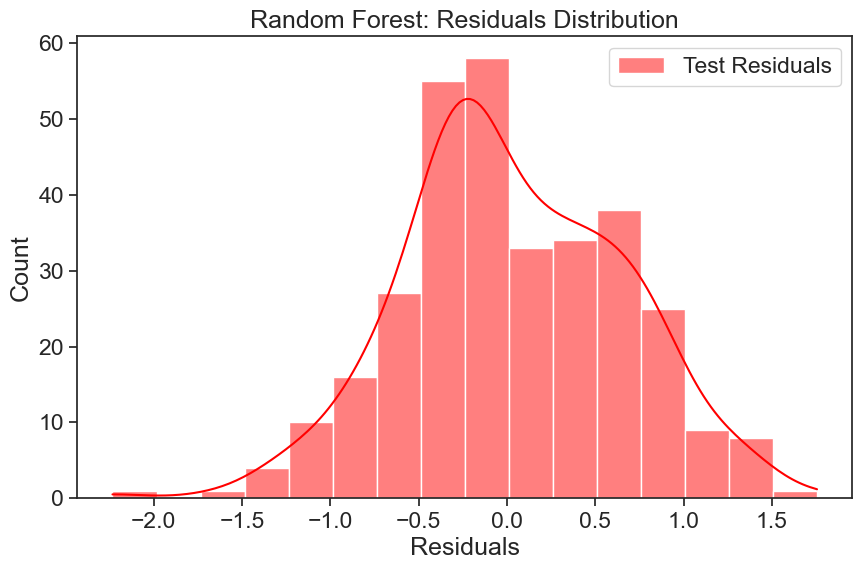

In [75]:
# Visualize residuals
test_residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(test_residuals, kde=True, color='red', label='Test Residuals')
plt.xlabel('Residuals')
plt.title('Random Forest: Residuals Distribution')
plt.legend()
plt.show()

In [76]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Data standardization process, scaling the data to mean 0 and variance 1
    ('svc', SVC(kernel='linear'))  # Support vector machine classifier, using linear kernel
])

In [77]:
# Function to perform K-Fold cross-validation with different K values
def evaluate_model_with_kfold(X, y, k_values):
    results = {}
    for k in k_values:
        print(f"Evaluating with K={k}")
        kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')
        results[k] = (np.mean(scores), np.std(scores))
        print(f"Mean Accuracy: {np.mean(scores):.2f}, Standard Deviation: {np.std(scores):.2f}\n")
    return results

In [78]:
# Define K values to evaluate
k_values = [5, 8, 10,12,15]


# Evaluate the model
results = evaluate_model_with_kfold(X, y, k_values)

Evaluating with K=5
Mean Accuracy: 0.58, Standard Deviation: 0.02

Evaluating with K=8
Mean Accuracy: 0.58, Standard Deviation: 0.03

Evaluating with K=10
Mean Accuracy: 0.58, Standard Deviation: 0.03

Evaluating with K=12
Mean Accuracy: 0.58, Standard Deviation: 0.04

Evaluating with K=15
Mean Accuracy: 0.58, Standard Deviation: 0.04



In [79]:
# Print summary of results - Usar esse modelo no assessment
for k, (mean, std) in results.items():
    print(f"K={k}: Mean Accuracy={mean:.2f}, Std={std:.2f}")

K=5: Mean Accuracy=0.58, Std=0.02
K=8: Mean Accuracy=0.58, Std=0.03
K=10: Mean Accuracy=0.58, Std=0.03
K=12: Mean Accuracy=0.58, Std=0.04
K=15: Mean Accuracy=0.58, Std=0.04


In [80]:
# Print summary of results
for k, (mean, std) in results.items():
    print(f"K={k}: Mean Accuracy={mean}, Std={std}")

K=5: Mean Accuracy=0.5791124608150471, Std=0.017049851475921106
K=8: Mean Accuracy=0.5803643216080402, Std=0.031039154492972173
K=10: Mean Accuracy=0.5828616352201258, Std=0.03202249197033287
K=12: Mean Accuracy=0.5809953989451241, Std=0.039619685481286936
K=15: Mean Accuracy=0.5791218479985893, Std=0.04349981318403596
